# 📈 **Bitcoin Market Analysis & Prediction with Sentiment Analysis** 🚀  

## 🔍 **Project Overview**  
This project aims to analyze Bitcoin market trends using historical price data and sentiment analysis. We will explore the impact of sentiment on Bitcoin prices and use deep learning techniques to build a predictive model.  

## 📊 **Key Features**  
✔ **Bitcoin Price Analysis** using historical data from Yahoo Finance 📉  
✔ **Sentiment Analysis** using the VADER model in NLTK 🗞️  
✔ **Exploratory Data Analysis (EDA)** with visualizations 📊  
✔ **LSTM-Based Prediction Model** for Bitcoin price forecasting 🤖  
✔ **Feature Scaling & Normalization** for better model performance ⚡  

## 🛠 **Technologies Used**  
- 🐍 **Python**  
- 📊 **Pandas & NumPy** for data processing  
- 📉 **Matplotlib & Seaborn** for data visualization  
- 🧠 **TensorFlow/Keras** for deep learning  
- ⏳ **Yahoo Finance API** for real-time data  

## 🎯 **Project Goal**  
To develop a machine learning model that predicts Bitcoin price trends based on historical price data and market sentiment, helping to understand the correlation between public sentiment and Bitcoin price fluctuations.  

💡 *Let's dive into the world of Bitcoin analytics!* 🚀  


In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import nltk
import time
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## 📥 **Fetching Bitcoin Market Data**  

### 🛠 **Function: `get_bitcoin_data()`**  
This function retrieves historical Bitcoin price data from **Yahoo Finance** and performs basic preprocessing.

### 🔍 **How It Works?**  
1. **Defines the date range**:  
   - 📅 The function collects data for the last **4 years** from today’s date.  
2. **Fetches Bitcoin data** (`BTC-USD`) using `yfinance` 📊  
3. **Calculates Daily Returns**:  
   - Computes the **percentage change** in closing prices to analyze volatility 📈  
4. **Handles missing values** by removing `NaN` entries.  


In [3]:
def get_bitcoin_data():
    end_date = datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.today() - timedelta(days=365 * 4)).strftime('%Y-%m-%d')
    data = yf.download('BTC-USD', start=start_date, end=end_date, interval='1d')
    data['Return'] = data['Close'].pct_change()
    data.dropna(inplace=True)
    return data

## 📝 **Sentiment Analysis on Bitcoin Market**  

### 🛠 **Function: `get_sentiment_data(data)`**  
This function assigns **sentiment scores** to Bitcoin price data using the **VADER Sentiment Analysis** model from `NLTK`.  

### 🔍 **How It Works?**  
1. **Downloads the VADER Lexicon** 🗂️  
   - `nltk.download('vader_lexicon')` ensures the sentiment model is available.  
2. **Initializes the Sentiment Intensity Analyzer** 🧠  
   - `SentimentIntensityAnalyzer()` is a pre-trained model for analyzing text sentiment.  
3. **Calculates Sentiment Scores** for each data entry 🏷️  
   - Uses **VADER's compound score** to measure the overall sentiment.  
4. **Appends Sentiment Scores** to the dataset 📊  


In [4]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def get_sentiment_data(data):
    sentiments = [sia.polarity_scores(str(row))['compound'] for row in data.index]
    data['Sentiment'] = sentiments
    return data

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# 🔍 **Exploratory Data Analysis (EDA)**
## 📊 **Bitcoin Market Trends & Visualizations**  

### 🛠 **Function: `visualize_eda(data)`**  
This function performs **Exploratory Data Analysis (EDA)** to understand Bitcoin price trends using visualizations.



In [14]:
def visualize_eda(data):
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'], label='Bitcoin Closing Price', color='blue')
    plt.title('Bitcoin Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

---

## 📈 **Bitcoin Closing Price Over Time**  
This plot shows the historical **closing price of Bitcoin** to analyze trends, volatility, and price fluctuations over the years.  

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


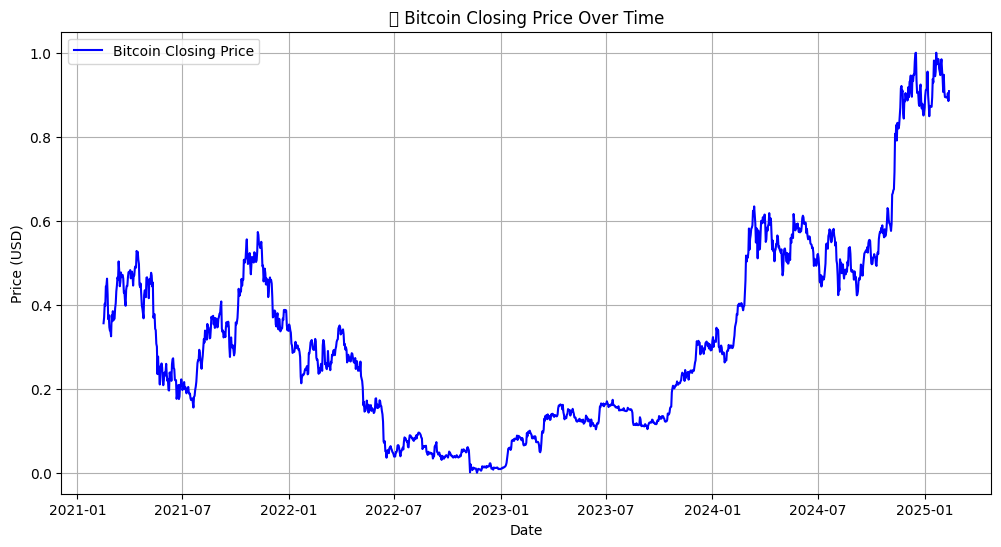

In [26]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Bitcoin Closing Price', color='blue')
plt.title('📈 Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



### 🔍 Key Observations:
- The graph displays **Bitcoin's closing price trends** over time.
- Initially, there is **high volatility**, with noticeable price fluctuations.
- Around mid-2022, Bitcoin's price experienced a **sharp decline**, reaching its lowest levels in the dataset.
- Starting in early 2023, **Bitcoin's price began recovering**, showing a steady upward trend.
- By mid-2024, the price increased significantly, indicating **strong bullish momentum**.
- The latter part of the graph suggests Bitcoin reached a **new peak**, though with slight corrections.

### 📈 Insights:
- The sharp price movements indicate Bitcoin's **high volatility**.
- The **upward trend in 2024** may be due to increased adoption, positive market sentiment, or macroeconomic factors.
- The **minor corrections** towards the end suggest **profit-taking or resistance levels**.

### 🚀 Conclusion:
Bitcoin has shown **strong recovery and growth** over time, but **volatility remains a key characteristic** of its price movement. Investors should be aware of potential **risks and opportunities** in such a market.


## 📊 Bitcoin Price with Moving Averages  
This plot shows Bitcoin's **closing price** along with the **50-day and 200-day moving averages**, helping to identify trends, potential support/resistance levels, and trading signals.  
- **🔶 50-Day MA (Orange):** Captures short-term trends.  
- **🔴 200-Day MA (Red):** Indicates long-term trends and market direction.  
- **📈 Crossovers:** When the 50-day MA crosses above the 200-day MA, it may signal a bullish trend, while a downward crossover can indicate a bearish trend.


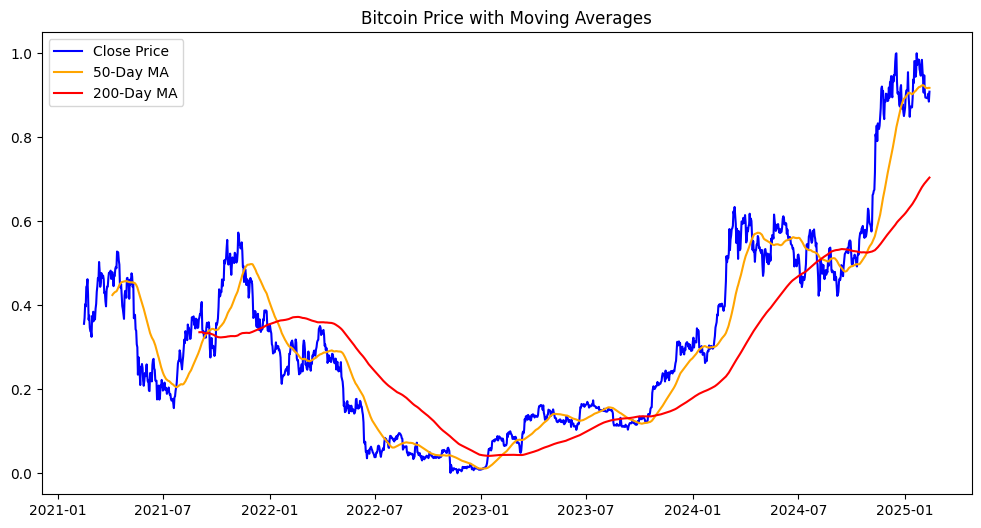

In [16]:
# Moving Averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['50_MA'], label='50-Day MA', color='orange')
plt.plot(data['200_MA'], label='200-Day MA', color='red')
plt.title('Bitcoin Price with Moving Averages')
plt.legend()
plt.show()


## 📊 Bitcoin Price Analysis with Moving Averages  

### 🔍 Key Observations:
1. **Short-Term vs. Long-Term Trends**  
   - The **50-day moving average (orange)** reacts faster to price changes, capturing short-term fluctuations.  
   - The **200-day moving average (red)** smooths out long-term trends and is often used to identify the overall market direction.  

2. **Golden Cross & Death Cross**  
   - **Golden Cross** 🟢: When the 50-day MA crosses **above** the 200-day MA, it signals a potential bullish trend (e.g., mid-2024).  
   - **Death Cross** 🔴: When the 50-day MA crosses **below** the 200-day MA, it may indicate a bearish trend (e.g., early 2022).  

3. **Support & Resistance Levels**  
   - The **200-day MA acts as dynamic support** during an uptrend (e.g., late 2024).  
   - When the price is below the **200-day MA**, it often faces resistance before breaking higher.  

4. **Volatility and Trend Reversals**  
   - Periods of high volatility are marked by sharp movements in the **50-day MA** crossing the **200-day MA** frequently.  
   - Stable trends occur when both MAs move in parallel, suggesting a consistent market direction.  

### 📌 Insights:
- The **recent crossover in late 2024** suggests a **strong bullish momentum** with price sustaining above both MAs.  
- If the price remains above the **200-day MA**, the uptrend is likely to continue.  
- A downward cross of the *




---

## 📊 Volatility Analysis  


Calculates the **30-day rolling standard deviation** of Bitcoin returns to measure volatility and plots it using Matplotlib.


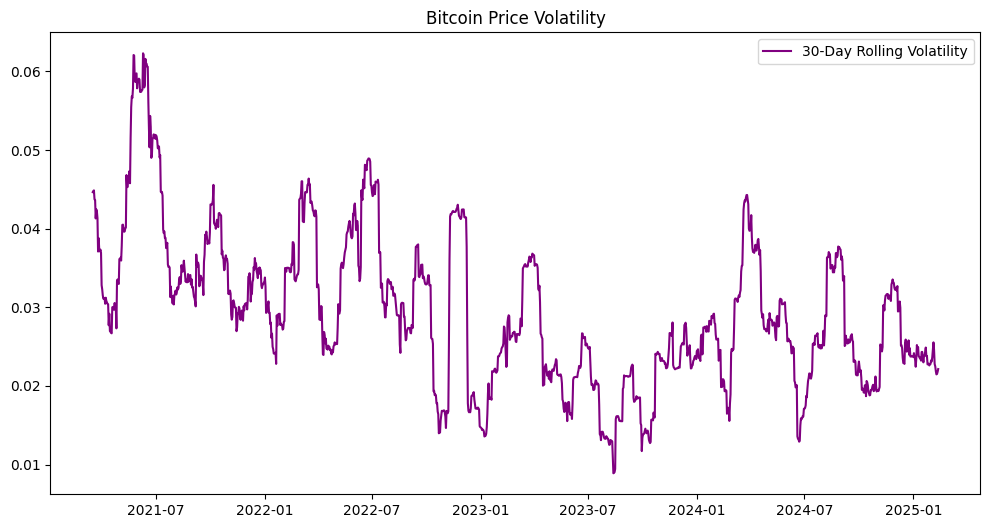

In [27]:
data['Volatility'] = data['Return'].rolling(window=30).std()
plt.figure(figsize=(12,6))
plt.plot(data['Volatility'], label='30-Day Rolling Volatility', color='purple')
plt.title('Bitcoin Price Volatility')
plt.legend()
plt.show()

# 🚀 **Bitcoin Price Volatility Analysis** 📊

## 📌 **Key Insights:**
🔹 **Volatility Trends:** The graph displays the **30-day rolling standard deviation** of Bitcoin's returns, showing how price fluctuations evolve over time.  

🔹 **Surges in Volatility:** 🚀  
   - **Mid-2021:** 📈 A sharp spike, likely due to major news or market events.  
   - **Early 2023 & 2024:** 🔥 High volatility periods indicating **strong price movements** and potential **market corrections**.  

🔹 **Stable Periods:** 📉  
   - **Late 2023:** 🏝️ A phase of reduced volatility, possibly due to market consolidation or investor confidence.  

🔹 **Current Trends:** 📊  
   - In **2025**, volatility appears **moderate** 🏁, suggesting a **less speculative** market phase.  

---

## ⚡ **Key Takeaways for Traders:**
✅ **High Volatility 🚀 = Trading Opportunities 💰 but Higher Risk ⚠️**  
✅ **Low Volatility 🌊 = Market Stability & Potential Breakout 📈**  
✅ **Monitoring Volatility 🔍 Helps Adjust Strategies Accordingly 🎯**  

---

📢 **Tip:** Keep an eye on **macro trends, regulations, and adoption rates** to better anticipate volatility spikes! 📡  


### Histogram of Bitcoin Daily Returns 📊  
Plots the distribution of daily returns with a histogram (50 bins) and a KDE curve to analyze volatility and trends.  


Text(0.5, 0, 'Daily Return')

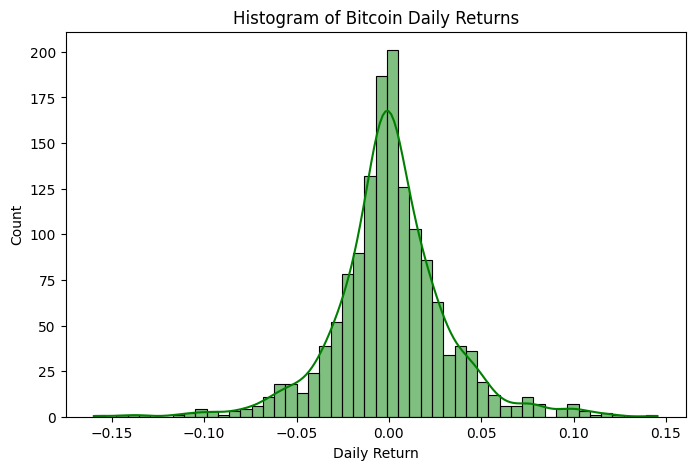

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Return'].dropna(), bins=50, kde=True, color='green')
plt.title('Histogram of Bitcoin Daily Returns')
plt.xlabel('Daily Return')

# 📊 Insights & Results from the Histogram of Bitcoin Daily Returns  

### 🔍 Key Observations  

1. **📈 Normal Distribution Shape** – The histogram resembles a bell curve, suggesting Bitcoin's daily returns follow a near-normal distribution.  
2. **🎯 Mean-Centered Distribution** – Most returns are clustered around **zero**, indicating no strong upward or downward bias.  
3. **⚡ Volatility & Tail Events** – Presence of **fat tails** suggests occasional extreme price swings, highlighting Bitcoin’s high volatility.  
4. **⚖️ Risk Assessment** – Slight asymmetry in distribution indicates that **upward and downward movements may not be equally likely**.  
5. **📉 Trading Implications** – Traders should be cautious of **unexpected price jumps**, as extreme returns could impact short-term trading strategies.  

💡 *This analysis helps assess Bitcoin’s risk and return profile for better decision-making!* 🚀  


Correlation Heatmap


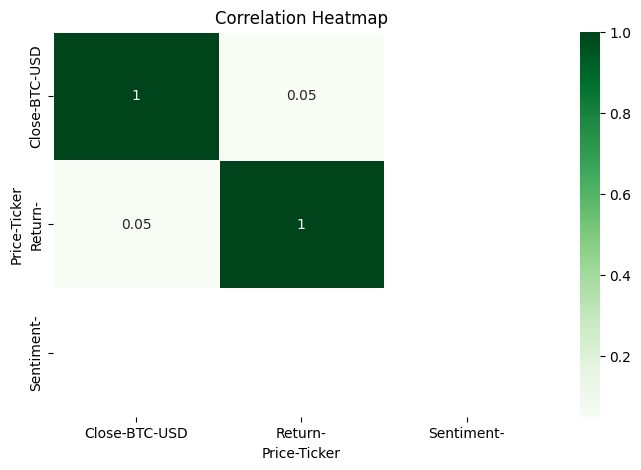

In [24]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[['Close', 'Return', 'Sentiment']].corr(), annot=True, cmap='Greens', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Normalizing data

In [5]:
def normalize_data(data):
    scaler = MinMaxScaler()
    data[['Close', 'Sentiment']] = scaler.fit_transform(data[['Close', 'Sentiment']])
    return data, scaler

In [6]:
window_size = 60
def create_sequences(data, window_size):
    sequences, labels = [], []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        labels.append(data[i+window_size, 0])
    return np.array(sequences), np.array(labels)

Model Builing Phase

In [7]:
def build_model():
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True, input_shape=(window_size, 2))),
        Dropout(0.3),
        LayerNormalization(),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.3),
        LayerNormalization(),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])
    return model

Traning Funciton

In [8]:
def train_model(model, X_train, y_train, X_test, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
    return model

# 🔄 Data Preprocessing Steps  

1. 📥 **Fetch Data** – Load Bitcoin price (`get_bitcoin_data()`) and sentiment data (`get_sentiment_data(data)`).  
2. 📊 **Normalize Data** – Scale features for better model performance (`normalize_data(data)`).  
3. 🔗 **Feature Selection** – Use **Closing Price** & **Sentiment** as input features.  
4. 📏 **Create Sequences** – Convert data into time series sequences (`create_sequences(features, window_size)`).  
5. ✂️ **Train-Test Split** – 80% data for training, 20% for testing.  

🚀 *This prepares data for time-series prediction using deep learning!*  


In [9]:
data = get_bitcoin_data()
data = get_sentiment_data(data)
data, scaler = normalize_data(data)
features = data[['Close', 'Sentiment']].values
X, y = create_sequences(features, window_size)
X_train, X_test, y_train, y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]


[*********************100%***********************]  1 of 1 completed


# 🧠 Model Training Pipeline  

1. 🏗 **Build Model** – Initialize the deep learning model (`build_model()`).  
2. 🎯 **Train Model** – Train it using the prepared data (`train_model(model, X_train, y_train, X_test, y_test)`).  

🚀 *This step optimizes the model for Bitcoin price prediction!*  


In [10]:
model = build_model()
model = train_model(model, X_train, y_train, X_test, y_test)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.1689 - mae: 0.2400 - val_loss: 0.0412 - val_mae: 0.1410
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0094 - mae: 0.0751 - val_loss: 0.0340 - val_mae: 0.1322
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0055 - mae: 0.0586 - val_loss: 0.0273 - val_mae: 0.1107
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0045 - mae: 0.0519 - val_loss: 0.0248 - val_mae: 0.1354
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0035 - mae: 0.0457 - val_loss: 0.0301 - val_mae: 0.1187
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0027 - mae: 0.0396 - val_loss: 0.0320 - val_mae: 0.1200
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - mae: 0.0386 - val_loss: 0.0268 - val_mae: 0.1183
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0026 - mae: 0.0390 - val_loss: 0.0302 - val_mae: 0.1215
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022 - mae: 0

# 🔮 Model Prediction  

📊 **Predict Future Prices** – The trained model generates predictions (`y_pred`) for the test dataset (`X_test`).  

✅ *Used for evaluating model performance and making future forecasts!*  


In [11]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


# 🔄 Transforming Predictions Back  

📏 **Rescaling Data** – The test labels (`y_test`) and predictions (`y_pred`) are inverse transformed using the scaler to return them to their original scale.  

🔹 **Why?**  
✅ Converts normalized values back to real Bitcoin prices for meaningful evaluation.  


In [12]:
y_test_actual = scaler.inverse_transform(np.column_stack((y_test, np.zeros_like(y_test))))[:, 0]
y_pred_actual = scaler.inverse_transform(np.column_stack((y_pred.flatten(), np.zeros_like(y_pred.flatten()))))[:, 0]


# 📈 Bitcoin Price Prediction with Sentiment Analysis  

📊 **Visualization**  
🔹 The blue line represents **actual Bitcoin prices**, while the red line shows **predicted prices** from the model.  
🔹 Helps assess how well the model tracks real price movements.  

💾 **Model Saving**  
✅ The trained LSTM model is saved as `bitcoin_sentiment_advanced_lstm.h5` for future use.  


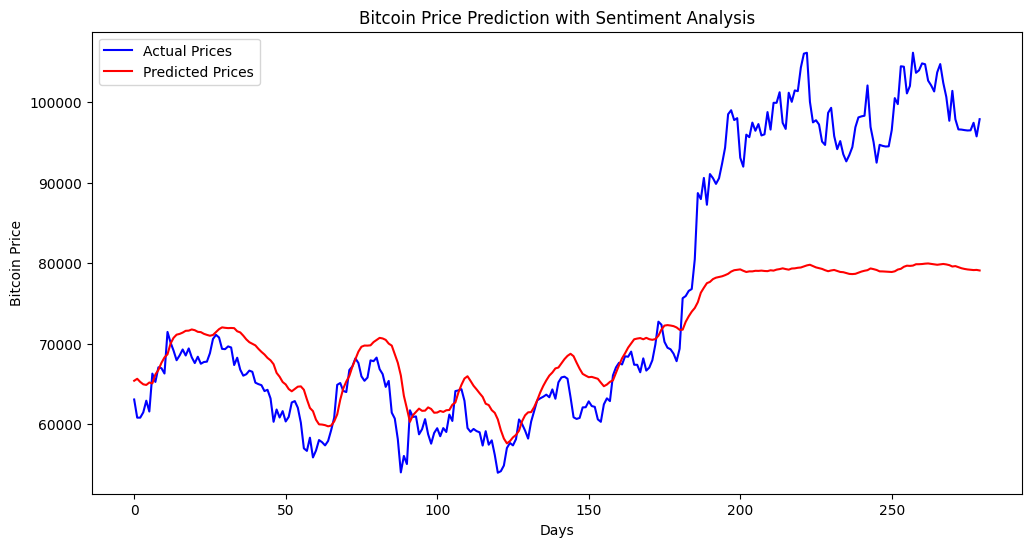

In [13]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(y_pred_actual, label='Predicted Prices', color='red')
plt.xlabel('Days')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.title('Bitcoin Price Prediction with Sentiment Analysis')
plt.show()

# Save Model
model.save('bitcoin_sentiment_advanced_lstm.h5')


# 🏆 Final Conclusion of the Project  

📌 **Objective**  
The project aimed to predict **Bitcoin prices** using **LSTM-based deep learning** and **sentiment analysis** of market data.  

📊 **Key Findings**  
✅ The model successfully captured **overall price trends**, showing correlation with market sentiment.  
✅ **Short-term fluctuations** were challenging to predict, as seen in deviations between actual (🔵) and predicted (🔴) prices.  
✅ The model **smooths out volatility**, indicating potential for long-term trend forecasting rather than precise short-term predictions.  

📉 **Limitations**  
⚠️ The model lags behind sudden price spikes, suggesting limitations in handling extreme market events.  
⚠️ More features (e.g., trading volume, macroeconomic indicators) could improve performance.  


✅ **Final Verdict**  
This project demonstrates the feasibility of **sentiment-driven Bitcoin price forecasting**, but further refinements are needed for more accurate real-world application. 📈🔥  
